In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import matplotlib.pyplot as plt
import cv2

In [4]:
path = "gdrive/My Drive/Colab Notebooks/Computer Vision with OpenCV and Deep Learning/Image Processing/DATA/"
img1 = cv2.imread(path + "dog_backpack.jpg")
type(img1)

numpy.ndarray

In [10]:
img2 = cv2.imread(path + "watermark_no_copy.png")
type(img2)

numpy.ndarray

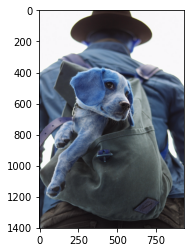

In [7]:
plt.imshow(img1)

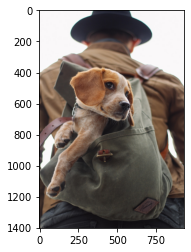

In [8]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)

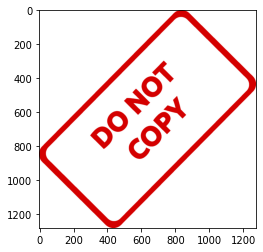

In [11]:
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

In [12]:
#blending images same size
img1 = cv2.resize(img1, (1200,1200))
img2 = cv2.resize(img2, (1200,1200))

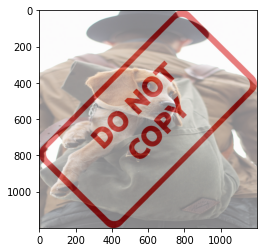

In [14]:
blended = cv2.addWeighted(img1, 0.5, img2, 0.5, 0)
plt.imshow(blended)

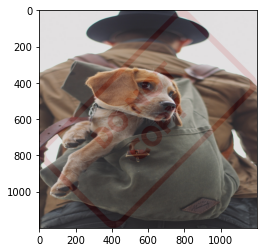

In [15]:
blended = cv2.addWeighted(img1, 0.8, img2, 0.1, 0)
plt.imshow(blended)

In [16]:
# overlay image, numpy reassign
import numpy as np

In [18]:
img1 = cv2.imread(path + "dog_backpack.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.imread(path + "watermark_no_copy.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

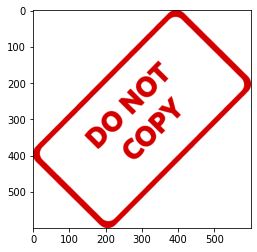

In [21]:
img2_smaller = cv2.resize(img2, (600,600))
plt.imshow(img2_smaller)

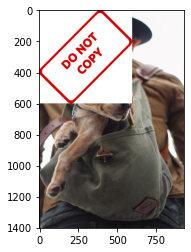

In [23]:
smaller = img2_smaller.copy()
larger = img1.copy()

x_offset = 0
y_offset = 0

x_end = x_offset + smaller.shape[1]
y_end = y_offset + smaller.shape[0]

larger[y_offset:y_end, x_offset:x_end] = smaller
plt.imshow(larger)

In [24]:
# blend diferent sizes
img1.shape

(1401, 934, 3)

In [25]:
x_offset = 934 - 600
y_offset = 1401 - 600

In [26]:
rows, cols, channels = img2_smaller.shape
(rows,cols,channels)

(600, 600, 3)

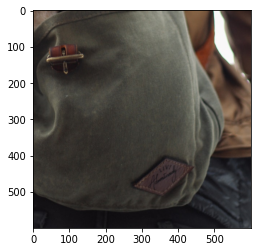

In [51]:
roi = img1[y_offset:1401, x_offset:934]
plt.imshow(roi)

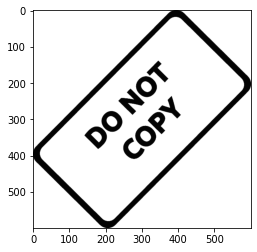

In [29]:
img2_gray = cv2.cvtColor(img2_smaller, cv2.COLOR_RGB2GRAY)
plt.imshow(img2_gray, cmap="gray")

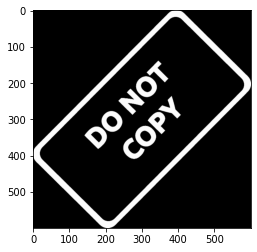

In [31]:
mask = cv2.bitwise_not(img2_gray)
plt.imshow(mask, cmap="gray")

In [33]:
mask.shape

(600, 600)

In [41]:
white_background = np.full(img2_smaller.shape, 255, dtype=np.uint8)
white_background.shape

(600, 600, 3)

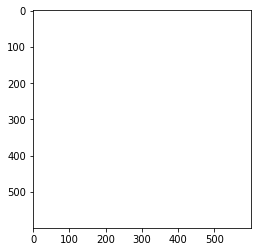

In [42]:
plt.imshow(white_background)

In [43]:
white_background

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

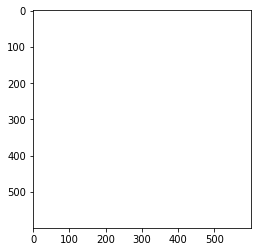

In [44]:
plt.imshow(white_background)

In [45]:
bk = cv2.bitwise_or(white_background, white_background, mask=mask)

In [46]:
bk.shape

(600, 600, 3)

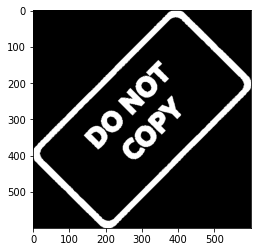

In [47]:
plt.imshow(bk)

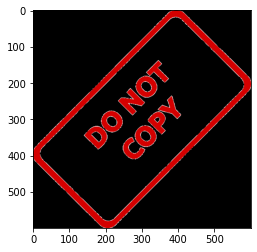

In [48]:
fg = cv2.bitwise_or(img2_smaller, img2_smaller, mask=mask)
plt.imshow(fg)

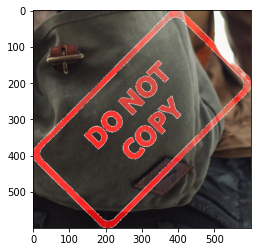

In [53]:
final_roi = cv2.bitwise_or(roi,fg)
plt.imshow(final_roi)

In [54]:
large_img = img1
small_img = final_roi

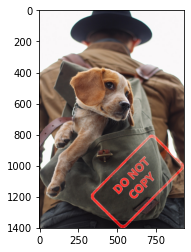

In [55]:
large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img
plt.imshow(large_img)